# Confidence Intervals: Examples

This notebook collects practical exercises of the concepts introduced in the course videos. I extended the notebook with relevant material not included in the course.

Overview of contents:

1. Definitions
2. Personal Notes: Using Distributions with Scipy - PDFs, CDFs
    - 2.1 List of Functions to Handle Distributions
    - 2.2 PDFs and CDFs: Examples
3. CI of One Proportion
    - Manual
    - With Statsmodels
4. CI of One Mean
    - QQ-Plot to Check Normality
    - Manual
    - With Statsmodels
5. **Cleaning and Preparing Datasets (for Two Groups): `crosstab`, `groupby.agg`**
6. CI of Two Proportions: Smokers vs Non-Smokers in Males & Females
    - Manual
    - With Statsmodels (One Proportion)
    - 6.1 Confidence Intervals for Subpopulations: Age Stratification
7. CI of Two Means (Independent Data): BMI mean in Males & Females
    - QQ-Plot to Check Normality
    - Manual
    - With Statsmodels (One Mean)
    - 7.1 Confidence Intervals for Subpopulations: Age Stratification
    - 7.2 Confidence Intervals and Samples Size

## 1. Definitions

We must distinguish between:
- Pupulation: the real total group of subjects we want to measure.
- Sample: the subset of the population we really measure, due to economical limits; measurements are assumed to be independent and identically distirbuted (iid.).

Even though we measure the sample, we can infer parameters of a population with confidence intervals (CI) defined around a best parameter estimate we have.

Note that we distinguish also
- Sample distribution: the distirbution of the data we have collected. We can compute parameters of it: mean, meadia, variance, proportions, etc.
- Sampling distribution: if define many iid. samples from the population and compute a parameter, the distribution of that parameter is the sampling distirbution. Accorsing to the Central Limit Theorem (CLT) it tends to be normal.

Having a confidenfe interval of 95% means that if we draw 100 independent samples and compute the parameter and its CI with the same method, 95 of the CIs will contain the real paramater of the population. Thus, the confidence is associated to the method we use.

In general, we use the following formula for the computation of the CI:

`Confidence Interval` = `Best Estimate` $\pm$ `Margin of Error`

The terms are obtained as follows:

- The `Best Estimate` is the parameter of our sample: sample mean, sample proportion.
- The `Margin of Error` is `K x Estimated Standard Error`; that is, `K` is how many standard errors we want to cover in the sampling distribution.
- `K` is defined as the value that covers X% in a symmetric Z or T distirbution; generally, `Z*(95%)` or `T*(95%,df=n-1)` are taken. Note that `Z*(95%) = 1.96`. The T distirbution tends to be Z with large sample sizes `n`.
- `Estimated Standard Error = sqrt(var(sample parameter) / n)`


## 2. Personal Notes: Using Distributions with Scipy - PDFs, CDFs

In the course videos, fixed values are used for `Z*(95%)` and `T*(95%,df)`. However, it is possible to obtain exact values with `scipy`.

For the CI computation, note that the `95%` coverage in the chosen distribution is two-sided; the significance level `alpha` related to that CI would be: `1 - alpha = 0.95 -> alpha = 0.05`. However, when we look in tables, that two-sided symmetry is not considered: we get `1 - alpha = P(x < v)`; instead, we would like: `1 - alpha = P(-v < x < v)`. In a symmetric distirbution, that can be intuitively achieved taking `1 - alpha/2 = P(x < v)`!

In [180]:
from scipy.stats import norm,t

In [181]:
# Confidence 95% -> significane level alpha = 0.05
# Since we have two sides, we need to consider: alpha/2 = 0.05/2
# Thus, the percentage we look is: 1 - alpha/2 = 0.975
T_star_95 = t(df=10).ppf(0.975)
print(T_star_95)

2.2281388519649385


In [182]:
Z_star_95 = norm.ppf(0.975)
print(Z_star_95)

1.959963984540054


### 2.1 List of Functions to Handle Distributions

Load distributions:
```python
from scipy.stats import binom,norm,cauchy
```
Instantiate a distribution with its parameters:
```python    
dist = binom(n, b)
dist = norm(m, s)
dist = cauchy(z, g)
...
```

Distributions have usually at least the `loc` and `scale` parameters, which are often related to the `mean` and `stddev`.

Get data:
```python
dist.rvs(N) # N random variables of the distribution
dist.pmf(x) # Probability Mass Function at values x for discrete distributions
dist.pdf(x) # Probability Density Function at values x for continuous distributions
dist.cdf(x) # Cumulative Distribution Function at values x for any distribution
dist.ppf(q) # Percent point function (inverse of `cdf`) at q (% of accumulated area) of the given RV
```
Note:
- `dist.cdf(v)` = $P (x < v)$; $P(x < \infty) = 1$
- `dist.ppf(q)` = $v | P(x < v) = q$

Fitting data to a distribution:
```python
# Choose distrbution or iterate through a set of candidates
# Data: replace this with real dataset
data = dist.rvs(10)
# Fit
params = dist.fit(data)
# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]
# Calculate fitted PDF and error with fit in distribution
pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
sse = np.sum(np.power(y - pdf, 2.0))
```

Get parameters:
```python
params = dist.stats() # Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’)
m = dist.mean()
std = dist.std()
...
```

Documentation:

    help(scipy.stat)
    https://docs.scipy.org/doc/scipy/reference/index.html

### 2.2 PDFs and CDFs: Examples

This section is a brief summary of a reading link provided in the course:

[An Introductory Guide to PDF and CDF](https://integratedmlai.com/normal-distribution-an-introductory-guide-to-pdf-and-cdf/)

In the link, definitions and examples are given focussing on the normal `N(m,s)` and the standard `Z = N(0,1)` distributions. However, the concepts are extensible to any other distributions.

Consider X is a random variable with a known distirbution. Then, we define:
- PDF = Probability Distribution Function. Likelihood distribution of the values of X. Given a range threshold for X, the are below PDF gives the probability of X to occur in that range. The total area is 1.
- CDF = Cumulative Distribution Function. The cumulative area (i.e., integral) below PDF as we increase a threshold value random variable v. The total area will be 1. We obtain from it the accumulated probabilities of ranges for x, for instance: P(X <= v).

#### PDF: Standard Normal Distirbution

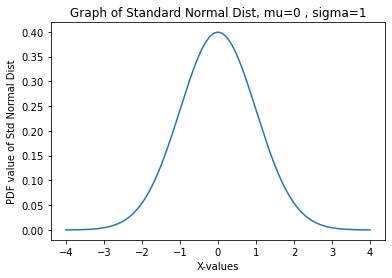

In [254]:
import scipy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
 
X = np.arange(-4, 4, 0.001)  # X is an array of x's
# Standard Normal: mean 0, std 1
Y = norm.pdf(X, loc=0, scale=1)  # Y is an array of probabilities
 
plt.title('Graph of Standard Normal Dist, mu=0 , sigma=1')
plt.xlabel('X-values')
plt.ylabel('PDF value of Std Normal Dist')
plt.plot(X, Y)
plt.show()

In [252]:
x = 1
p = norm.pdf(x=x, loc=0.0, scale=1.0)
print(f'The probability x = "{x}" is {p}.')

The probability x = "1" is 0.24197072451914337.


#### CDF: Normal Distribution

In [255]:
from scipy.stats import norm
# mean 3, std 2
less_than_5=norm.cdf(x=5, loc=3, scale=2)
print(less_than_5)

0.8413447460685429


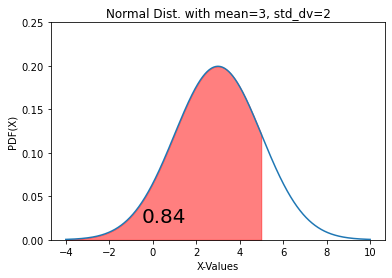

In [265]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4, 10, 0.001)
ax.plot(x, norm.pdf(x, loc=3, scale=2))
ax.set_title("Normal Dist. with mean=3, std_dv=2")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
# for fill_between
px=np.arange(-4,5, 0.01)
ax.set_ylim(0, 0.25)
ax.fill_between(px, norm.pdf(px, loc=3, scale=2), alpha=0.5, color='r')
# for text
ax.text(-0.5, 0.02, round(less_than_5, 2), fontsize=20)
plt.show()

In [259]:
# P(0.2 < X 5)
norm(1, 2).cdf(5) - norm(1,2).cdf(0.2)

0.632671609662145

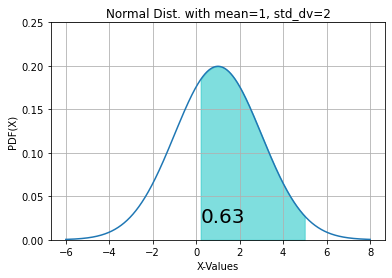

In [266]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("Normal Dist. with mean=1, std_dv=2")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
ax.grid(True)
px=np.arange(0.2,5,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='c')
pro=norm(1,2).cdf(5) - norm(1,2).cdf(0.2)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

In [263]:
# P(X > 3)
greater_than_3 = norm.sf(x=3, loc=4, scale=2)
greater_than_3

0.6914624612740131

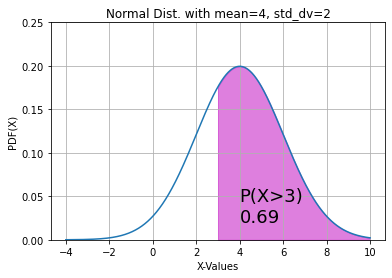

In [267]:
fig, ax = plt.subplots()
x= np.arange(-4, 10, 0.001)
ax.plot(x, norm.pdf(x, loc=4, scale=2))
ax.set_title("Normal Dist. with mean=4, std_dv=2")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
ax.grid(True)
px=np.arange(3, 10, 0.01)
ax.set_ylim(0, 0.25)
ax.fill_between(px, norm.pdf(px, loc=4, scale=2), alpha=0.5, color='m')
ax.text(4, 0.02, "P(X>3)\n%.2f" %(greater_than_3), fontsize=18)
plt.show()

## 3. CI of One Proportion

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

Example: a hospital polls toddler parents whether they use a car seat. The estimated parameter is the proportion of parents who use a car seat. Data:
- `n = 659` parents sampled.
- 540 responded 'yes'.

### Manual Computation

In [183]:
import numpy as np

In [184]:
# T*: See above, how to compute it with scipy
tstar = 1.96
# Sample size
n = 659.0
# Proportion
p = 540.0/n
# Standard Error
se = np.sqrt((p * (1 - p))/n)
se

0.014984499401390045

In [185]:
# Lower and Upper Bounds
lcb = p - tstar * se
ucb = p + tstar * se
(lcb, ucb)

(0.7900537499137914, 0.8487929875672404)

### CI Computation with Statsmodels

In [186]:
import statsmodels.api as sm

In [187]:
sm.stats.proportion_confint(n * p, n)

(0.7900542895874294, 0.8487924478936024)

## 4. CI of One Mean

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Example (Cartwheel dataset): What is the **average** cartwheel distance (in inches) for adults? (distance from the forward foot before performing the cartwheel to the final foot after performing it).

In [188]:
import pandas as pd

In [189]:
df = pd.read_csv("Cartwheeldata.csv")

In [190]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [230]:
mean = df["CWDistance"].mean()
sd = df["CWDistance"].std()
n = len(df)
print(n)

25


### QQ-Plot to Check Normality

In [233]:
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

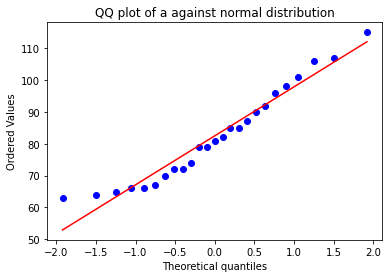

In [234]:
stats.probplot(df["CWDistance"], dist="norm", plot=plt)
plt.title('QQ plot of a against normal distribution')
plt.show()

### Manual Computation

In [192]:
tstar = 2.064
se = sd/np.sqrt(n)
print(se)

3.0117104774529713


In [193]:
lcb = mean - tstar * se
ucb = mean + tstar * se
(lcb, ucb)

(76.26382957453707, 88.69617042546294)

### Computation with Statsmodels

In [194]:
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean()

(76.57715593233026, 88.38284406766975)

## 5. Cleaning and Preparing Datasets (for Two Groups): `crosstab`, `groupby.agg`

In order to compute **proportions or means in for several categories**, some steps need to be taken with `pandas`:

- Data must be cleaned (`np.nan`) and often category names are changed (gender, yes/no, etc.).
- Cross-tables must be created with `pd.crosstab` and `pd.groupby().agg()`: these summarize proportions, means, sizes for two categories/groups from the same categorical variable.

Examples with the NHANES dataset analyzed in the next sections are prepared in this section; these examples are:
1. Compare proportions of smokers and non-smokers for males & females.
2. Compare means of BMI for males & females.

In [195]:
import pandas as pd
import numpy as np
#import statsmodels.api as sm

In [196]:
url = "nhanes_2015_2016.csv"
da = pd.read_csv(url)

In [197]:
# Recode SMQ020 from 1/2 to Yes/No into new variable SMQ020x
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
da["SMQ020x"].head()

0    Yes
1    Yes
2    Yes
3     No
4     No
Name: SMQ020x, dtype: object

In [198]:
# Recode RIAGENDR from 1/2 to Male/Female into new variable RIAGENDRx
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da["RIAGENDRx"].head()

0      Male
1      Male
2      Male
3    Female
4    Female
Name: RIAGENDRx, dtype: object

In [199]:
# Cross-Table: Very useful for counting/frequencies of different groups
dx = da[["SMQ020x", "RIAGENDRx"]].dropna()
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [200]:
# Recode (again) SMQ020x from Yes/No to 1/0 into existing variable SMQ020x
# We recode is again because with 1/0, the mean yields the proportion :)
dx["SMQ020x"] = dx.SMQ020x.replace({"Yes": 1, "No": 0})

In [201]:
# Group By + Aggregate: Very Useful for porportionas and means of different groups
# groupby().agg() creates a new table with aggregated summary values
# in groupby we say which category groups we want in the rows
# and with agg() we say the aggregate function to be applied in the columns
dy = dx.groupby("RIAGENDRx").agg({"SMQ020x": [np.mean, np.size]})
dy.columns = ["Proportion", "n"]
dy

,Proportion,n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


In [202]:
da["BMXBMI"].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [203]:
dz = da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})
dz.columns = ["BMI_mean", "BMI_std", "BMI_n"]
dz

,BMI_mean,BMI_std,BMI_n
RIAGENDRx,,,
Female,29.939946,7.753319,2976
Male,28.778072,6.252568,2759


## 6. CI of Two Proportions: Smokers vs Non-Smokers in Males & Females

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error\ for\ Difference\ of\ Two\ Population\ Proportions\ Or\ Means = \sqrt{(SE_{\ 1})^2 + (SE_{\ 2})^2}$$

In [204]:
dy

,Proportion,n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


### Manual Computation

In [205]:
p_f = dy.loc['Female','Proportion']
n_f = dy.loc['Female','n']
se_female = np.sqrt(p_f * (1 - p_f)/n_f)
se_female

0.008444152146214435

In [206]:
p_m = dy.loc['Male','Proportion']
n_m = dy.loc['Male','n']
se_male = np.sqrt(p_m * (1 - p_m)/ n_m)
se_male

0.009526078653689868

In [207]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729881381407434

In [208]:
d = p_f - p_m
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff
(lcb, ucb)

(-0.2333636091471941, -0.18346247413207697)

### Computation with Statsmodels: One Proportion, Not Two

In [210]:
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
0,2066,1340
1,906,1413


In [212]:
# 95% CI for the proportion of females who smoke (compare to value above)
sm.stats.proportion_confint(906, 906+2066)

(0.2882949879861214, 0.32139545615923526)

In [213]:
# 95% CI for the proportion of males who smoke (compare to value above)
sm.stats.proportion_confint(1413, 1413+1340)

(0.49458749263718593, 0.5319290347874418)

### 6.1 Confidence Intervals for Subpopulations: Age Stratification

In [154]:
# Calculate the smoking rates within age/gender groups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": lambda x: np.mean(x=="Yes")}).unstack()
pr.columns = ["Female", "Male"]
pr

,Female,Male
agegrp,,
"(18, 30]",0.226601,0.349265
"(30, 40]",0.286920,0.502183
"(40, 50]",0.268924,0.448878
"(50, 60]",0.421277,0.572687
"(60, 70]",0.374150,0.654462
"(70, 80]",0.324390,0.649254


In [155]:
# The number of people for each calculated proportion
dn = da.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": np.size}).unstack()
dn.columns = ["Female", "Male"]
dn

,Female,Male
agegrp,,
"(18, 30]",609,544
"(30, 40]",474,458
"(40, 50]",502,401
"(50, 60]",470,454
"(60, 70]",441,437
"(70, 80]",410,402


In [156]:
# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)
se

,Female,Male
agegrp,,
"(18, 30]",0.016964,0.020440
"(30, 40]",0.020776,0.023363
"(40, 50]",0.019790,0.024838
"(50, 60]",0.022776,0.023217
"(60, 70]",0.023043,0.022748
"(70, 80]",0.023120,0.023801


In [157]:
# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)
se_diff

agegrp
(18, 30]    0.026562
(30, 40]    0.031265
(40, 50]    0.031758
(50, 60]    0.032523
(60, 70]    0.032380
(70, 80]    0.033182
dtype: float64

In [158]:
# Standard errors for the difference in smoking rates between genders, within age bands
# The difference in smoking rates between genders
pq = pr.Female - pr.Male
pq

agegrp
(18, 30]   -0.122664
(30, 40]   -0.215264
(40, 50]   -0.179954
(50, 60]   -0.151411
(60, 70]   -0.280313
(70, 80]   -0.324863
dtype: float64

In [159]:
import seaborn as sns

Text(0, 0.5, 'Female - male smoking proportion')

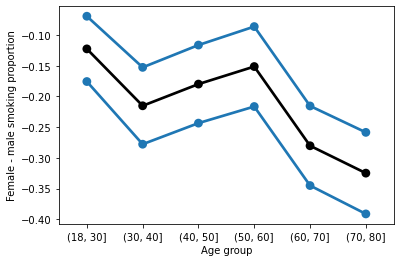

In [162]:
x = np.arange(pq.size)
pp = sns.pointplot(x=x, y=pq.values, color='black')
sns.pointplot(x=x, y=pq - 2*se_diff)
sns.pointplot(x=x, y=pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

## 7. CI of Two Means (Independent Data): BMI mean in Males & Females

Note that these formulas are for inpendent measurements; for paired data the formula changes.

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

$$Standard\ Error\ for\ Difference\ of\ Two\ Population\ Proportions\ Or\ Means = \sqrt{(SE_{\ 1})^2 + (SE_{\ 2})^2}$$

In [235]:
dz

,BMI_mean,BMI_std,BMI_n
RIAGENDRx,,,
Female,29.939946,7.753319,2976
Male,28.778072,6.252568,2759


### QQ-Plot to Check Normality

In [238]:
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [241]:
# dz = da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})
bmi_f = da[da["RIAGENDRx"] == "Female"]["BMXBMI"]
bmi_m = da[da["RIAGENDRx"] == "Male"]["BMXBMI"]

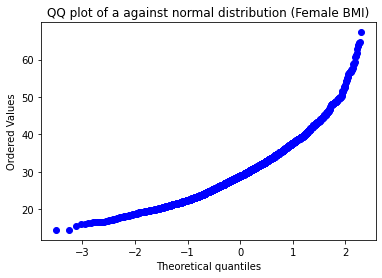

In [246]:
stats.probplot(bmi_f, dist="norm", plot=plt)
plt.title('QQ plot of a against normal distribution (Female BMI)')
plt.show()

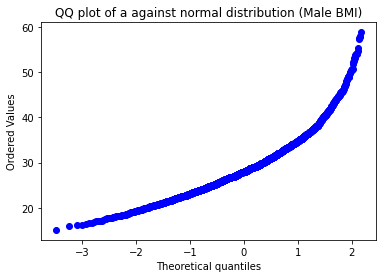

In [247]:
stats.probplot(bmi_m, dist="norm", plot=plt)
plt.title('QQ plot of a against normal distribution (Male BMI)')
plt.show()

### Manual Computation

In [164]:
se_mean_female = dz.loc['Female','BMI_std'] / np.sqrt(dz.loc['Female','BMI_n'])
se_mean_male = dz.loc['Male','BMI_std'] / np.sqrt(dz.loc['Male','BMI_n'])
(se_mean_female, se_mean_male)

(0.14212522940758335, 0.11903715722332033)

In [165]:
se_mean_diff = np.sqrt(se_mean_female**2 + se_mean_male**2)
se_mean_diff

0.18538992862064455

In [166]:
d = dz.loc['Female','BMI_mean'] - dz.loc['Male','BMI_mean']
d

1.1618735403269653

In [215]:
lcb = d - 1.96 * se_mean_diff
ucb = d + 1.96 * se_mean_diff
(lcb, ucb)

(-0.5717773017360988, 0.15495121845682774)

#### Computation with Statsmodels: One Mean, not Two

In [220]:
# Important note: .loc[] creates a new copy, unlike df[df] conditioning, which creates a view!
female_bmi = da.loc[da.RIAGENDRx=="Female", "BMXBMI"].dropna()
female_bmi.head()

3     42.4
4     20.3
5     28.6
7     28.2
12    26.6
Name: BMXBMI, dtype: float64

In [221]:
sm.stats.DescrStatsW(female_bmi).zconfint_mean()

(29.659875498090155, 30.22001580625768)

### 7.1 Confidence Intervals for Subpopulations: Age Stratification

In [269]:
# Calculate the mean, SD, and sample size for BMI within age/gender groups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": [np.mean, np.std, np.size]}).unstack()
pr

BMXBMI                                           
                mean                  std             size     
RIAGENDRx     Female       Male    Female      Male Female Male
agegrp                                                         
(18, 30]   28.123881  27.391822  7.745893  6.649440    609  544
(30, 40]   30.325586  29.611726  8.315608  6.622412    474  458
(40, 50]   31.160643  29.724623  8.076195  6.407076    502  401
(50, 60]   30.743777  29.231486  7.575848  5.914373    470  454
(60, 70]   31.074828  29.392488  7.604514  5.933307    441  437
(70, 80]   29.138213  27.957692  6.284968  4.974855    410  402

In [271]:
# Calculate the SEM for females and for males within each age band
pr["BMXBMI", "sem", "Female"] = pr["BMXBMI", "std", "Female"] / np.sqrt(pr["BMXBMI", "size", "Female"]) 
pr["BMXBMI", "sem", "Male"] = pr["BMXBMI", "std", "Male"] / np.sqrt(pr["BMXBMI", "size", "Male"]) 
pr

BMXBMI                                                       \
                mean                  std             size            sem   
RIAGENDRx     Female       Male    Female      Male Female Male    Female   
agegrp                                                                      
(18, 30]   28.123881  27.391822  7.745893  6.649440    609  544  0.313879   
(30, 40]   30.325586  29.611726  8.315608  6.622412    474  458  0.381949   
(40, 50]   31.160643  29.724623  8.076195  6.407076    502  401  0.360458   
(50, 60]   30.743777  29.231486  7.575848  5.914373    470  454  0.349448   
(60, 70]   31.074828  29.392488  7.604514  5.933307    441  437  0.362120   
(70, 80]   29.138213  27.957692  6.284968  4.974855    410  402  0.310392   

                     
                     
RIAGENDRx      Male  
agegrp               
(18, 30]   0.285092  
(30, 40]   0.309445  
(40, 50]   0.319954  
(50, 60]   0.277575  
(60, 70]   0.283829  
(70, 80]   0.248123

In [273]:
# Conservative value of T*
n = min(pr["BMXBMI", "size", "Female"].min(), pr["BMXBMI", "size", "Male"].min())
from scipy.stats import norm,t
T_star_95 = t(df=n-1).ppf(0.975)
T_star_95

1.965912343229391

In [275]:
# Calculate the mean difference of BMI between females and males within each age band, also  calculate
# its SE and the lower and upper limits of its 95% CI.
pr["BMXBMI", "mean_diff", ""] = pr["BMXBMI", "mean", "Female"] - pr["BMXBMI", "mean", "Male"]
pr["BMXBMI", "sem_diff", ""] = np.sqrt(pr["BMXBMI", "sem", "Female"]**2 + pr["BMXBMI", "sem", "Male"]**2) 
pr["BMXBMI", "lcb_diff", ""] = pr["BMXBMI", "mean_diff", ""] - T_star_95 * pr["BMXBMI", "sem_diff", ""] 
pr["BMXBMI", "ucb_diff", ""] = pr["BMXBMI", "mean_diff", ""] + T_star_95 * pr["BMXBMI", "sem_diff", ""]
pr

BMXBMI                                                       \
                mean                  std             size            sem   
RIAGENDRx     Female       Male    Female      Male Female Male    Female   
agegrp                                                                      
(18, 30]   28.123881  27.391822  7.745893  6.649440    609  544  0.313879   
(30, 40]   30.325586  29.611726  8.315608  6.622412    474  458  0.381949   
(40, 50]   31.160643  29.724623  8.076195  6.407076    502  401  0.360458   
(50, 60]   30.743777  29.231486  7.575848  5.914373    470  454  0.349448   
(60, 70]   31.074828  29.392488  7.604514  5.933307    441  437  0.362120   
(70, 80]   29.138213  27.957692  6.284968  4.974855    410  402  0.310392   

                                                             
                    mean_diff  sem_diff  lcb_diff  ucb_diff  
RIAGENDRx      Male                                          
agegrp                                                       
(18, 30]   0.285092  0.732059  0.424026 -0.101539  1.565657  
(30, 40]   0.309445  0.713861  0.491570 -0.252522  1.680244  
(40, 50]   0.319954  1.436019  0.481976  0.488497  2.383542  
(50, 60]   0.277575  1.512291  0.446275  0.634953  2.389630  
(60, 70]   0.283829  1.682340  0.460097  0.777830  2.586851  
(70, 80]   0.248123  1.180521  0.397377  0.399312  1.961730

Text(0, 0.5, 'Female - Male BMI difference')

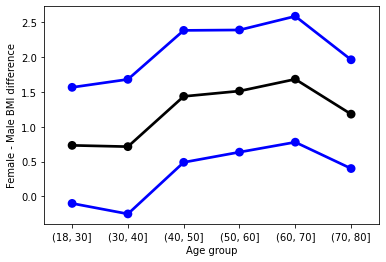

In [276]:
# Plot the mean difference in black and the confidence limits in blue
x = np.arange(pr.shape[0]) # age ranges
pp = sns.pointplot(x=x, y=pr["BMXBMI", "mean_diff", ""], color='black')
sns.pointplot(x=x, y=pr["BMXBMI", "lcb_diff", ""], color='blue')
sns.pointplot(x=x, y=pr["BMXBMI", "ucb_diff", ""], color='blue')
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - Male BMI difference")

In [277]:
print(pr)

              BMXBMI                                                       \
                mean                  std             size            sem   
RIAGENDRx     Female       Male    Female      Male Female Male    Female   
agegrp                                                                      
(18, 30]   28.123881  27.391822  7.745893  6.649440    609  544  0.313879   
(30, 40]   30.325586  29.611726  8.315608  6.622412    474  458  0.381949   
(40, 50]   31.160643  29.724623  8.076195  6.407076    502  401  0.360458   
(50, 60]   30.743777  29.231486  7.575848  5.914373    470  454  0.349448   
(60, 70]   31.074828  29.392488  7.604514  5.933307    441  437  0.362120   
(70, 80]   29.138213  27.957692  6.284968  4.974855    410  402  0.310392   

                                                             
                    mean_diff  sem_diff  lcb_diff  ucb_diff  
RIAGENDRx      Male                                          
agegrp                                     

### 7.2 Confidence Intervals and Samples Size

As sample size increases, the confidence interval shrinks, because we have more precision.

In [174]:
# Samples of size 100, 200, 400, 800 taken randomly 500x each.
# The mean and its CI are built.
# The span of the CI (LCB, UCB) is shown: it decreases with the sample size.
dx = da.loc[da.RIAGENDRx=="Female", ["RIAGENDRx", "BMXBMI"]].dropna()
all_cis = []
for n in 100, 200, 400, 800:
    cis = []
    for i in range(500):
        dz = dx.sample(n)
        ci = sm.stats.DescrStatsW(dz.BMXBMI).zconfint_mean()
        cis.append(ci)
    cis = np.asarray(cis)
    mean_width = cis[:, 1].mean() - cis[:, 0].mean()
    print(n, mean_width)
    all_cis.append(cis)

100 3.0342843196354714
200 2.149571115202395
400 1.5195890295943926
800 1.074859862663633


In [175]:
from matplotlib import pyplot as plt

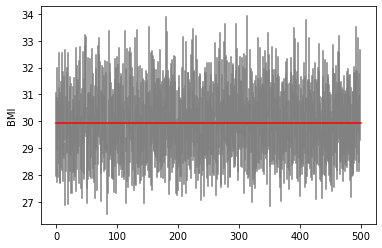

In [176]:
# Al confidence intervals plotted
# Population mean plotted
ci = all_cis[0]
for j, x in enumerate(ci):
    plt.plot([j, j], x, color='grey')
    plt.gca().set_ylabel("BMI")
mn = dx.BMXBMI.mean()
plt.plot([0, 500], [mn, mn], color='red')

In [177]:
# How many times is the real mean outside from the boundaries?
print(np.mean(ci[:, 1] < mn)) # Upper limit falls below the target
print(np.mean(ci[:, 0] > mn)) # Lower limit falls above the target

0.034
0.016
